# 📊 Dataset Overview

- **Rows:** 1,259  
- **Columns:** 27  
- **Topic:** Mental Health in Tech Industry


# 🔄 7 Stages of Data Science Life Cycle

## ✅ Stage 1: Problem Definition & Business Understanding

### 🎯 Objectives

1) **Primary Goal:**  
   Analyze factors affecting mental health in tech workplaces.

2) **Research Questions**
   - What workplace factors most influence mental health treatment seeking?
   - How does company size affect mental health support?
   - Is there a relationship between remote work and mental health?
   - Do demographics (age, gender, country) impact mental health discussions?
   - What role does family history play in seeking treatment?

---

### ✅ Success Metrics
- Model Accuracy **> 80%**
- F1-Score **> 0.75**
- Identify **Top 5 influential features**


## ✅ Stage 2: Data Collection & Description

### Data Source
- **Dataset:** Mental Health in Tech Survey (2014-2016)
- **Type:** Anonymous survey responses

---

### Column Descriptions

| Column Name               | Description                                  | Type                     |
|---------------------------|----------------------------------------------|---------------------------|
| Timestamp                 | Survey submission time                       | DateTime                  |
| Age                       | Respondent age                               | Numeric                   |
| Gender                    | Gender identity                              | Categorical               |
| Country                   | Country of residence                         | Categorical               |
| state                     | State (if USA)                               | Categorical               |
| self_employed             | Self-employment status                       | Binary                    |
| family_history            | Family history of mental illness             | Binary                    |
| treatment                 | Sought mental health treatment (TARGET)      | Binary                    |
| work_interfere            | Work interference level                      | Ordinal                   |
| no_employees              | Company size                                 | Categorical (contains errors) |
| remote_work               | Remote work option                           | Binary                    |
| tech_company              | Works in tech company                        | Binary                    |
| benefits                  | Mental health benefits provided              | Categorical               |
| care_options              | Awareness of care options                    | Categorical               |
| wellness_program          | Wellness program available                   | Categorical               |
| seek_help                 | Resources for seeking help available         | Categorical               |
| anonymity                 | Company protects anonymity                   | Categorical               |
| leave                     | Ease of taking leave                         | Ordinal                   |
| mental_health_consequence | Fear of consequences (mental)                | Categorical               |
| phys_health_consequence   | Physical health consequences                 | Categorical               |
| coworkers                 | Comfort discussing with coworkers            | Categorical               |
| supervisor                | Comfort discussing with supervisor           | Categorical               |
| mental_health_interview   | Discuss mental health during interview       | Categorical               |
| phys_health_interview     | Discuss physical health during interview     | Categorical               |
| mental_vs_physical        | Mental vs physical health priority           | Categorical               |
| obs_consequence           | Observed consequences                        | Binary                    |
| comments                  | Open-ended comments                          | Text                      |


# ✅ Stage 3: Data Preparation & Cleaning

## 3.1 Import Libraries & Load Data

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('Mental Health.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## 3.2 Data Quality Assessment ##

In [76]:
# Missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nPercentage Missing:\n{(df.isnull().sum()/len(df)*100).round(2)}")

# Data types
print("\nData Types:")
print(df.dtypes)

# Basic statistics
print("\nNumerical Summary:")
print(df.describe())

Missing Values:
Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age_Group                    7
treatment_binary             0
mental_health_openness       0
dtype: int64

Percentage Missing:
Timestamp                    0.00
Age                          0.00
Gender        

## 3.3 Handle Missing Values ##

In [77]:
# Strategy for missing values
# 1. Drop 'state' if too many missing (only for USA)
# 2. For 'self_employed': fill with mode
# 3. For 'work_interfere': create 'Unknown' category
# 4. Drop 'comments' (text field, not useful for modeling)

# Check missing percentages
missing_pct = (df.isnull().sum()/len(df)*100)

# Drop columns with >40% missing or not useful
cols_to_drop = ['comments', 'state']
df = df.drop(columns=cols_to_drop)

# Fill missing values
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)
df['work_interfere'].fillna('Unknown', inplace=True)

# For other categorical columns, fill with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

print("After handling missing values:")
print(df.isnull().sum())

KeyError: "['comments', 'state'] not found in axis"

## 3.5 Handle Age Outliers ##

In [ ]:
# Check age distribution
print("Age Statistics:")
print(df['Age'].describe())

# Identify unrealistic ages
print(f"\nAges < 18: {(df['Age'] < 18).sum()}")
print(f"Ages > 100: {(df['Age'] > 100).sum()}")
print(f"Negative ages: {(df['Age'] < 0).sum()}")

# Visualize age distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot(df['Age'])
plt.title('Age Boxplot (Before Cleaning)')
plt.ylabel('Age')

plt.subplot(1, 3, 2)
plt.hist(df['Age'], bins=50, edgecolor='black')
plt.title('Age Distribution (Before)')
plt.xlabel('Age')

# Filter to realistic ages (18-80)
df_clean = df[(df['Age'] >= 18) & (df['Age'] <= 80)].copy()

plt.subplot(1, 3, 3)
plt.hist(df_clean['Age'], bins=30, edgecolor='black', color='green')
plt.title('Age Distribution (After)')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

print(f"\nRows removed: {len(df) - len(df_clean)}")
print(f"New shape: {df_clean.shape}")

df = df_clean

## 3.6 Standardize Gender Column ##

In [ ]:
# Gender has many variations - standardize to Male/Female/Other
print("Original Gender Values:")
print(df['Gender'].value_counts())

def standardize_gender(gender):
    if pd.isna(gender):
        return 'Other'
    
    gender = str(gender).lower().strip()
    
    # Male variations
    male_terms = ['male', 'm', 'man', 'cis male', 'mail', 'male-ish', 
                  'maile', 'mal', 'male (cis)', 'make', 'man', 'msle', 
                  'cis man', 'malr', 'ostensibly male']
    
    # Female variations
    female_terms = ['female', 'f', 'woman', 'cis female', 'femake', 
                    'cis-female/femme', 'femail', 'female (cis)']
    
    if any(term in gender for term in male_terms):
        return 'Male'
    elif any(term in gender for term in female_terms):
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(standardize_gender)

print("\nStandardized Gender:")
print(df['Gender'].value_counts())

## 3.7 Feature Engineering ##

In [ ]:
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 80], 
                          labels=['18-25', '26-35', '36-45', '46-55', '55+'])

# Binary encoding for target
df['treatment_binary'] = df['treatment'].map({'Yes': 1, 'No': 0})

# Create composite feature: mental health openness score
openness_cols = ['coworkers', 'supervisor', 'mental_health_interview']
def openness_score(row):
    score = 0
    for col in openness_cols:
        if row[col] == 'Yes':
            score += 2
        elif row[col] == 'Some of them':
            score += 1
    return score

df['mental_health_openness'] = df.apply(openness_score, axis=1)

print("New features created:")
print(df[['Age_Group', 'treatment_binary', 'mental_health_openness']].head())

# Stage 4: Exploratory Data Analysis (EDA) #
## 4.1 Univariate Analysis ##

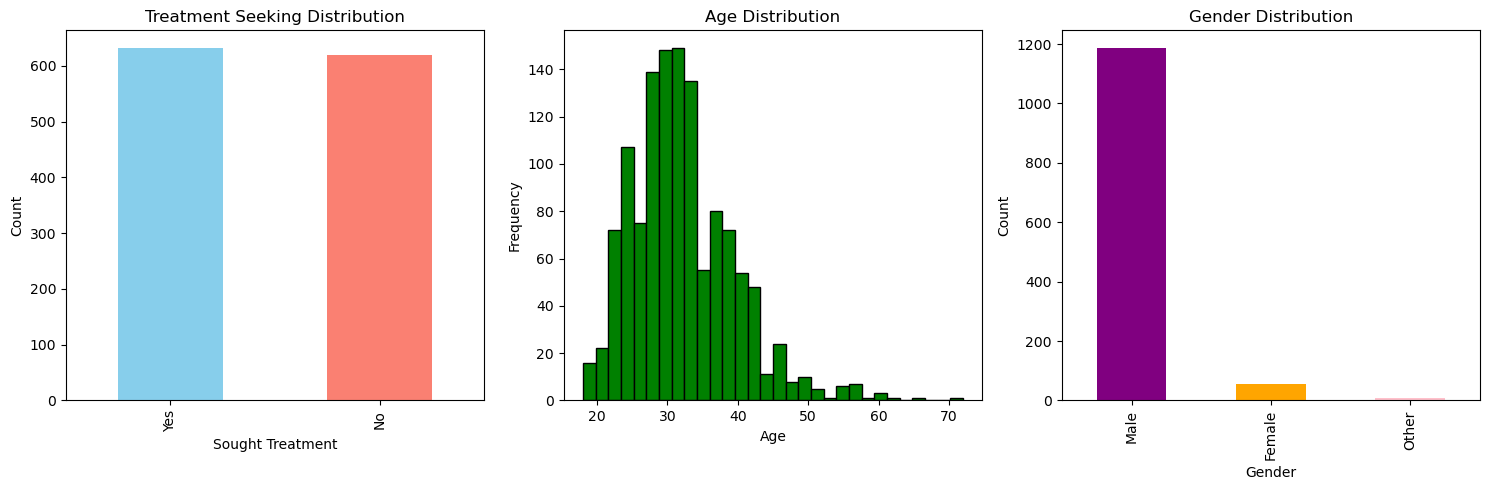

In [78]:
# Target variable distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['treatment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Treatment Seeking Distribution')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')

# Age distribution
plt.subplot(1, 3, 2)
plt.hist(df['Age'], bins=30, edgecolor='black', color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender distribution
plt.subplot(1, 3, 3)
df['Gender'].value_counts().plot(kind='bar', color=['purple', 'orange', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## 4.2 Bivariate Analysis ##

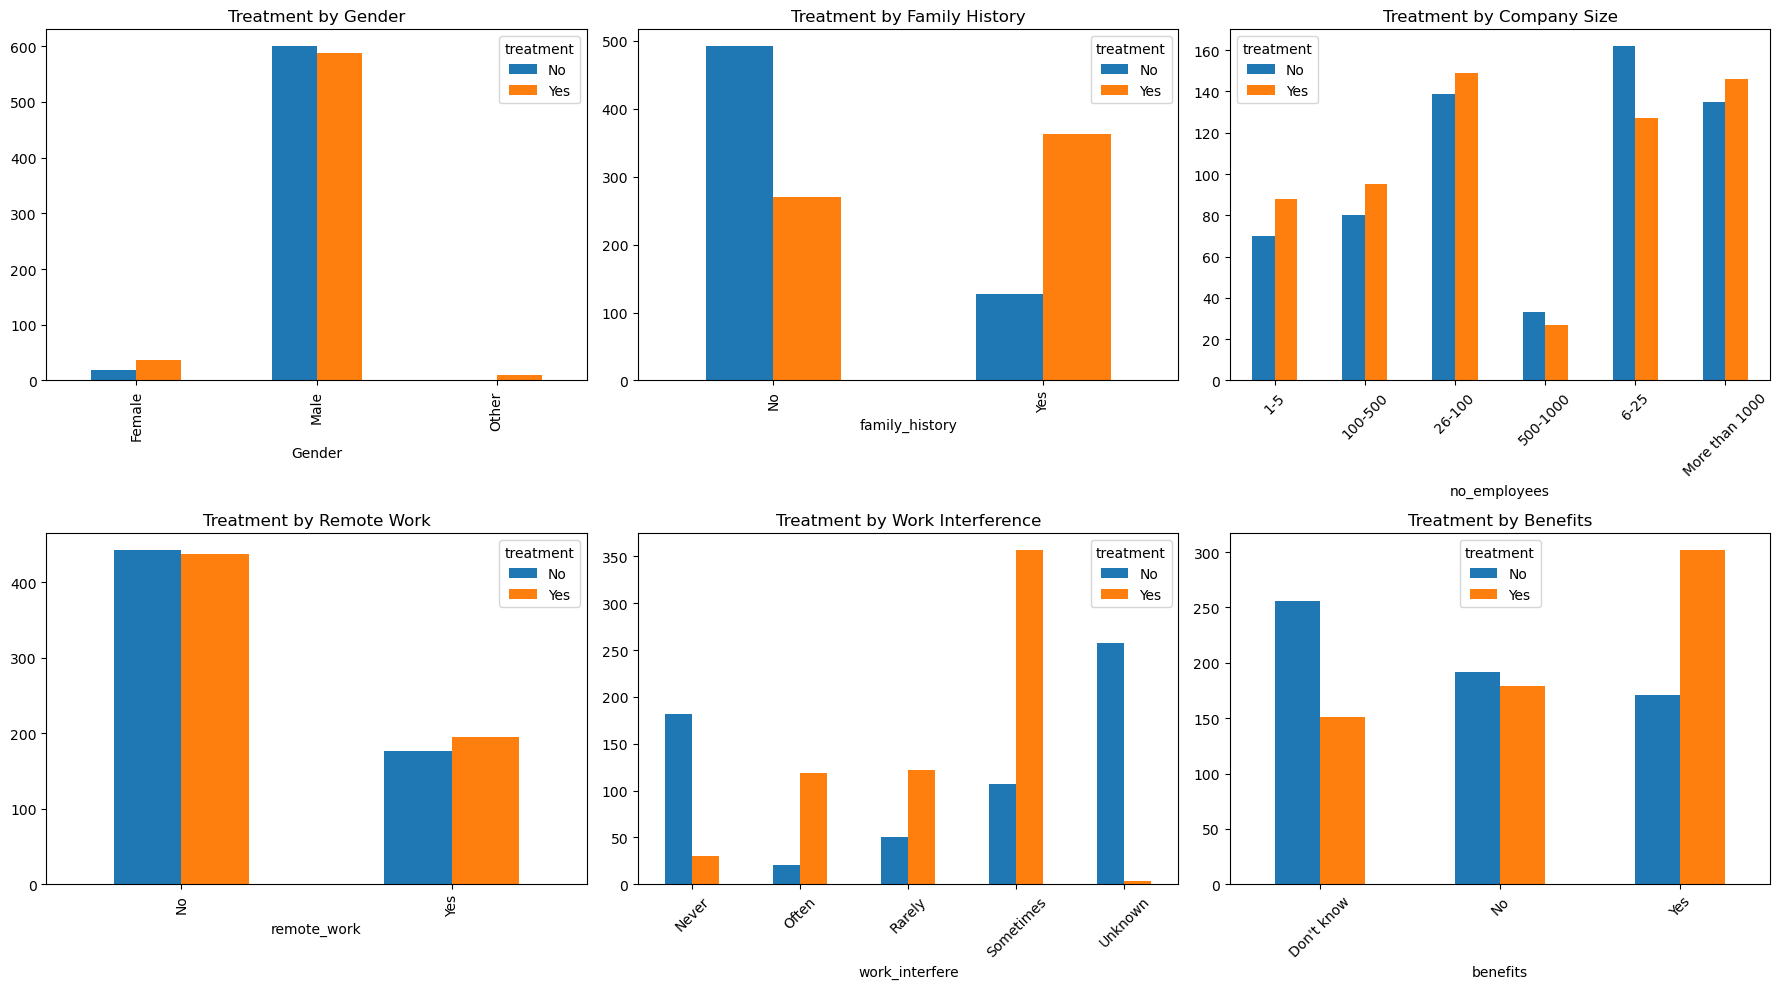

In [79]:
# Treatment by different factors
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Treatment by Gender
pd.crosstab(df['Gender'], df['treatment']).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Treatment by Gender')
axes[0,0].set_xlabel('Gender')

# Treatment by Family History
pd.crosstab(df['family_history'], df['treatment']).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Treatment by Family History')

# Treatment by Company Size
pd.crosstab(df['no_employees'], df['treatment']).plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Treatment by Company Size')
axes[0,2].tick_params(axis='x', rotation=45)

# Treatment by Remote Work
pd.crosstab(df['remote_work'], df['treatment']).plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Treatment by Remote Work')

# Treatment by Work Interference
pd.crosstab(df['work_interfere'], df['treatment']).plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Treatment by Work Interference')
axes[1,1].tick_params(axis='x', rotation=45)

# Treatment by Benefits
pd.crosstab(df['benefits'], df['treatment']).plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Treatment by Benefits')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4.3 Correlation Analysis ##

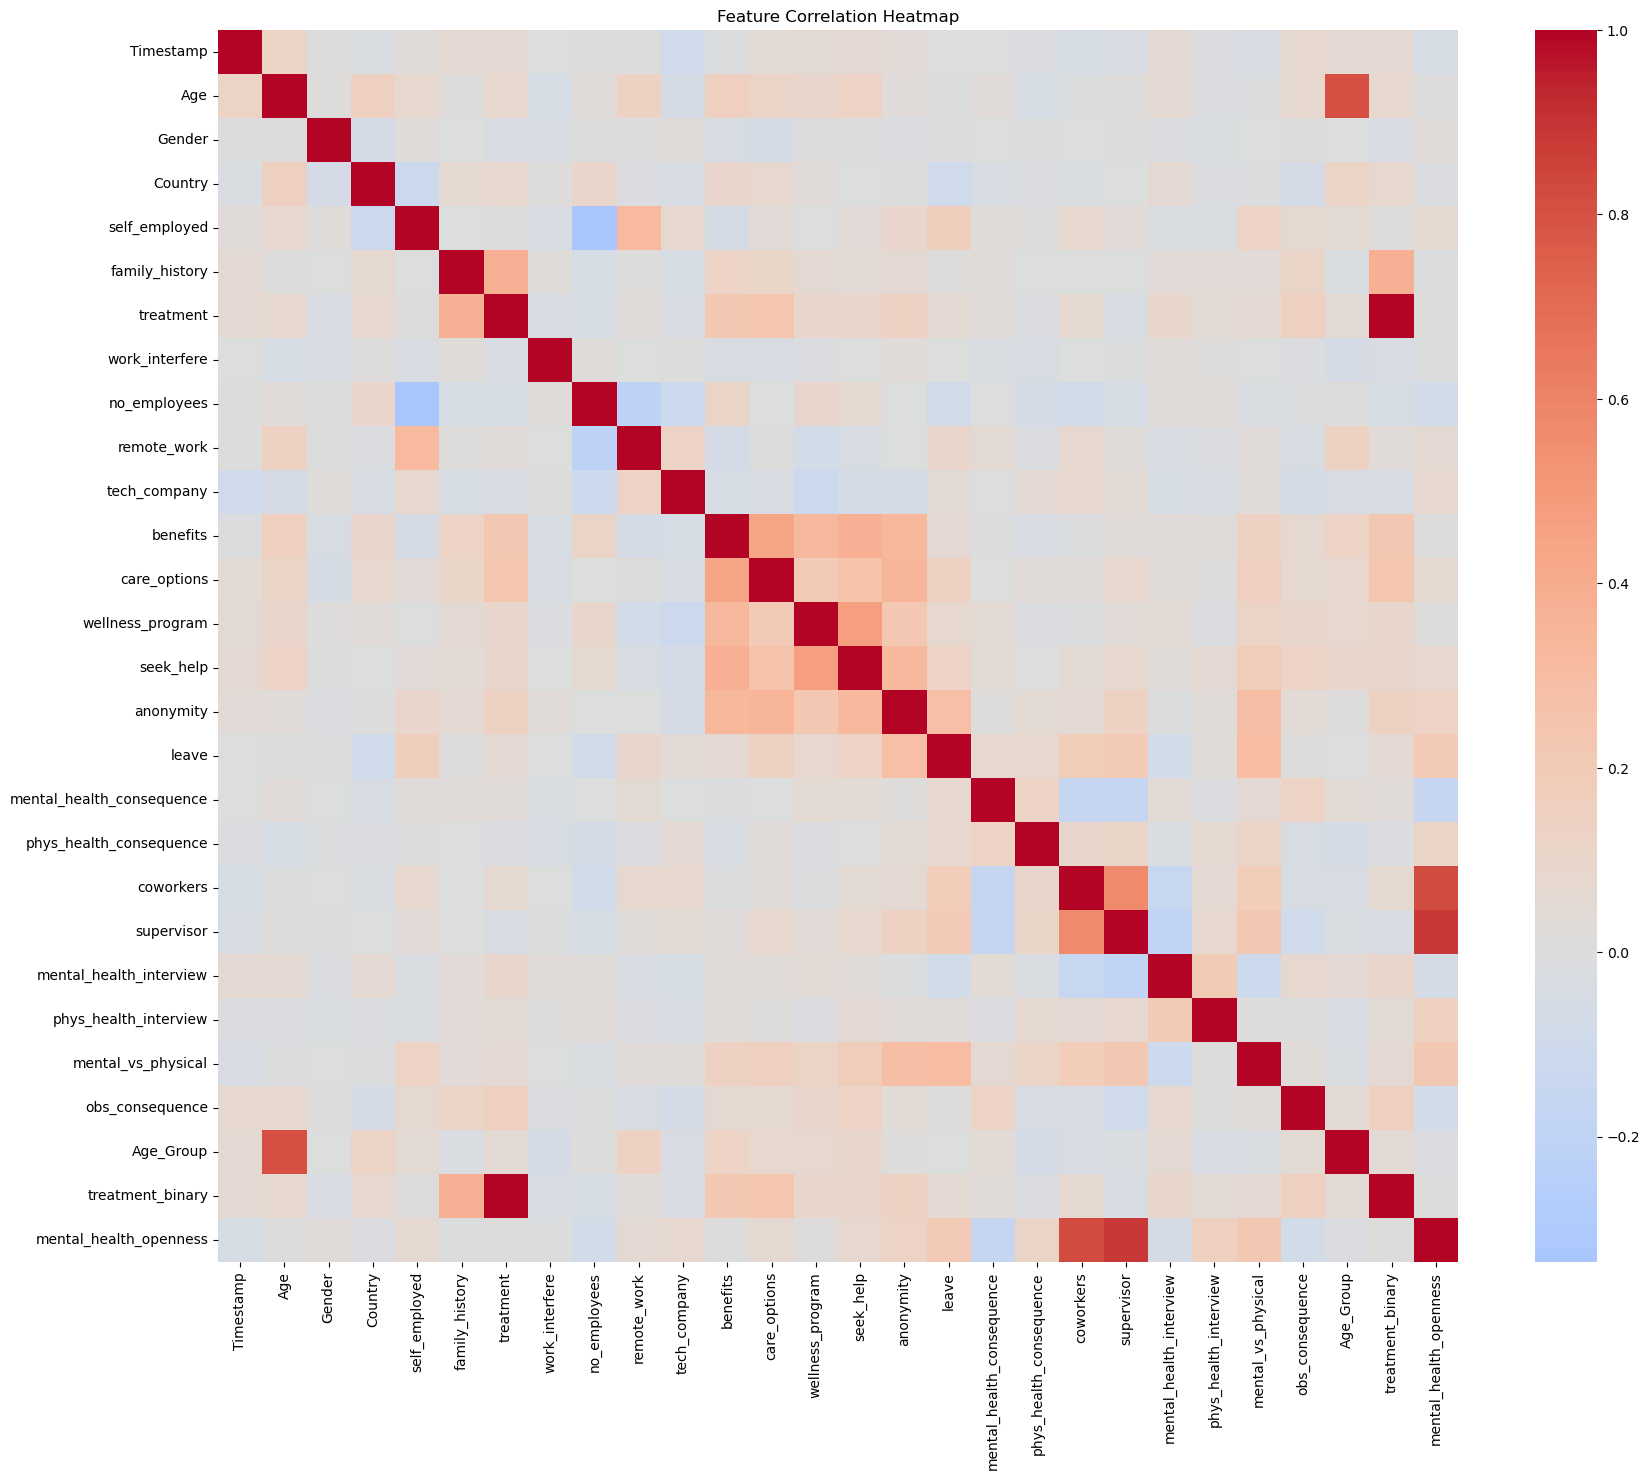

Top 10 Features Correlated with Treatment:
treatment                  1.000000
treatment_binary           1.000000
family_history             0.376674
care_options               0.235429
benefits                   0.224731
obs_consequence            0.152524
anonymity                  0.142364
mental_health_interview    0.093528
wellness_program           0.091278
seek_help                  0.089175
Country                    0.080316
Name: treatment_binary, dtype: float64


In [80]:
le = LabelEncoder()
df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype(str)   # Convert to string
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Now correlation will work
plt.figure(figsize=(20,16))
correlation_matrix = df_encoded.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

# Top correlations
treatment_corr = correlation_matrix['treatment_binary'].sort_values(ascending=False)
print("Top 10 Features Correlated with Treatment:")
print(treatment_corr.head(11))


## 4.4 Outlier Detection ##


Age Outlier Bounds:
Lower: 13.50, Upper: 49.50
Outliers: 32 (2.56%)

mental_health_openness Outlier Bounds:
Lower: -2.00, Upper: 6.00
Outliers: 0 (0.00%)


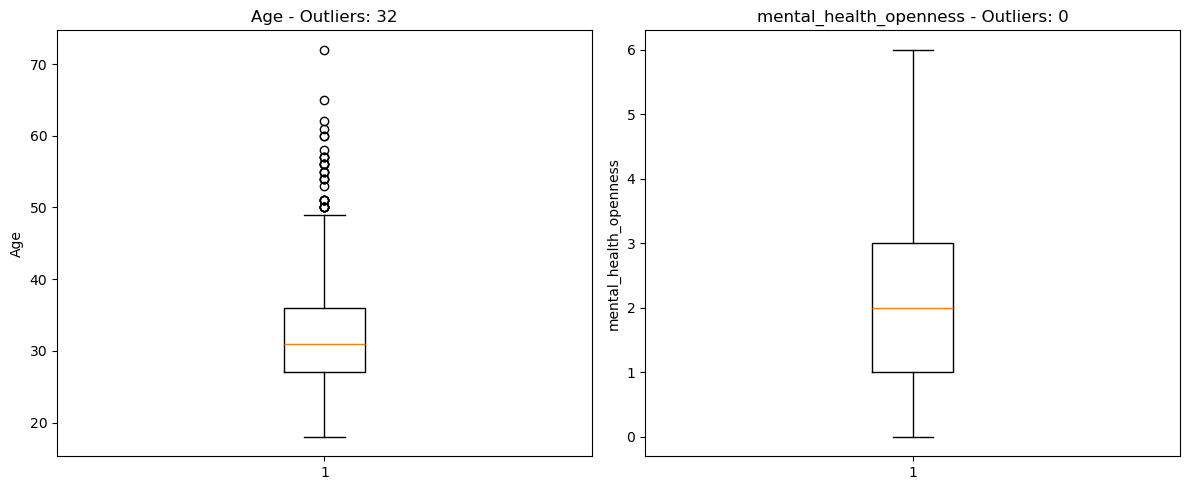

In [81]:
# Detect outliers in numerical columns
numerical_cols = ['Age', 'mental_health_openness']

plt.figure(figsize=(12, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    plt.boxplot(df[col])
    plt.title(f'{col} - Outliers: {len(outliers)}')
    plt.ylabel(col)
    
    print(f"\n{col} Outlier Bounds:")
    print(f"Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")
    print(f"Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

plt.tight_layout()
plt.show()

# Hypothesis Testing #
##  Hypothesis 1: Family History Effect ##
#### H0: Family history has no effect on seeking treatment ####
#### H1: Family history significantly affects treatment seeking ####

Hypothesis 1: Family History vs Treatment
Chi-square statistic: 175.9552
P-value: 3.7036e-40
Degrees of freedom: 1
✓ Reject H0: Family history significantly affects treatment seeking


<Figure size 1000x600 with 0 Axes>

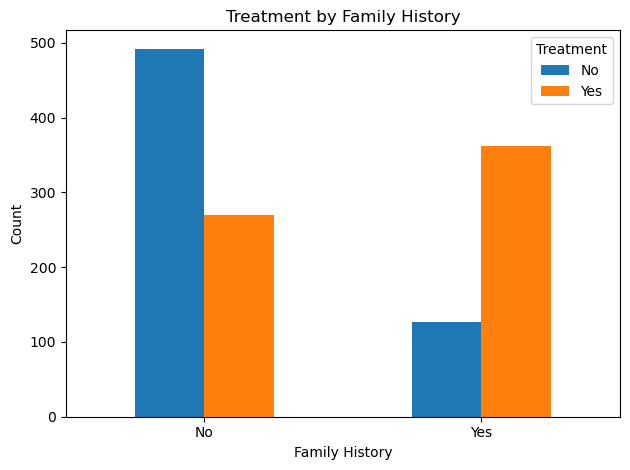

In [53]:
# Chi-square test
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['family_history'], df['treatment'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Hypothesis 1: Family History vs Treatment")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print("✓ Reject H0: Family history significantly affects treatment seeking")
else:
    print("✗ Fail to reject H0: No significant effect")

# Visualization
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=False)
plt.title('Treatment by Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##  Hypothesis 2: Gender Differences ##
#### H0: No difference in treatment seeking across genders ####
#### H1: Significant difference exists ####

In [82]:
contingency_table2 = pd.crosstab(df['Gender'], df['treatment'])
chi2_2, p_value_2, dof_2, expected_2 = chi2_contingency(contingency_table2)

print("\nHypothesis 2: Gender vs Treatment")
print(f"Chi-square statistic: {chi2_2:.4f}")
print(f"P-value: {p_value_2:.4e}")

if p_value_2 < 0.05:
    print("✓ Reject H0: Significant gender differences exist")
else:
    print("✗ Fail to reject H0: No significant gender differences")


Hypothesis 2: Gender vs Treatment
Chi-square statistic: 12.4086
P-value: 2.0207e-03
✓ Reject H0: Significant gender differences exist


##  Hypothesis 3: Company Size Effect ##
#### H0: Company size doesn't affect treatment seeking ####
#### H1: Company size significantly affects treatment ####

In [83]:
contingency_table3 = pd.crosstab(df['no_employees'], df['treatment'])
chi2_3, p_value_3, dof_3, expected_3 = chi2_contingency(contingency_table3)

print("\nHypothesis 3: Company Size vs Treatment")
print(f"Chi-square statistic: {chi2_3:.4f}")
print(f"P-value: {p_value_3:.4e}")

if p_value_3 < 0.05:
    print("✓ Reject H0: Company size significantly affects treatment")
else:
    print("✗ Fail to reject H0: No significant effect")


Hypothesis 3: Company Size vs Treatment
Chi-square statistic: 8.8188
P-value: 1.1651e-01
✗ Fail to reject H0: No significant effect


##  Hypothesis 4: Age Group Differences ##
#### H0: No difference in treatment across age groups ####
#### H1: Significant age-related differences exist ####

In [84]:
from scipy.stats import f_oneway

# ANOVA test
age_groups = [group['Age'].values for name, group in df[df['treatment'] == 'Yes'].groupby('Age_Group')]
f_stat, p_value_4 = f_oneway(*age_groups)

print("\nHypothesis 4: Age Group Differences")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_4:.4e}")

if p_value_4 < 0.05:
    print("✓ Reject H0: Significant age differences exist")
else:
    print("✗ Fail to reject H0: No significant age differences")


Hypothesis 4: Age Group Differences
F-statistic: 1057.6405
P-value: 2.8496e-276
✓ Reject H0: Significant age differences exist


##  Hypothesis 5: Remote Work Impact ##
#### H0: Remote work has no impact on treatment seeking ####
#### H1: Remote work significantly impacts treatment ####

In [85]:
contingency_table5 = pd.crosstab(df['remote_work'], df['treatment'])
chi2_5, p_value_5, dof_5, expected_5 = chi2_contingency(contingency_table5)

print("\nHypothesis 5: Remote Work vs Treatment")
print(f"Chi-square statistic: {chi2_5:.4f}")
print(f"P-value: {p_value_5:.4e}")

if p_value_5 < 0.05:
    print("✓ Reject H0: Remote work significantly affects treatment")
else:
    print("✗ Fail to reject H0: No significant effect")


Hypothesis 5: Remote Work vs Treatment
Chi-square statistic: 0.7667
P-value: 3.8124e-01
✗ Fail to reject H0: No significant effect


# Stage 5: Data Modeling #
## 5.1 Prepare Data for Modeling ##

In [58]:
# Select features for modeling
feature_cols = ['Age', 'Gender', 'family_history', 'work_interfere', 
                'no_employees', 'remote_work', 'tech_company', 'benefits',
                'care_options', 'wellness_program', 'seek_help', 'anonymity',
                'leave', 'mental_health_consequence', 'phys_health_consequence',
                'coworkers', 'supervisor', 'mental_health_interview',
                'phys_health_interview', 'mental_vs_physical', 'obs_consequence',
                'mental_health_openness']

# Encode all categorical variables
df_model = df[feature_cols + ['treatment_binary']].copy()

from sklearn.preprocessing import LabelEncoder
le_dict = {}

for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    le_dict[col] = le

print("Encoded dataset shape:", df_model.shape)
df_model.head()


Encoded dataset shape: (1251, 23)


,Age,Gender,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,mental_health_openness,treatment_binary
0,37,1,0,1,4,0,1,2,1,1,...,1,1,1,2,1,0,2,0,3,1
1,44,1,0,2,5,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,32,1,0,2,4,0,1,1,0,1,...,1,1,2,2,2,2,1,0,6,0
3,31,1,1,1,2,0,1,1,2,1,...,2,2,1,0,0,0,1,1,1,1
4,31,1,0,0,1,1,1,2,0,0,...,1,1,1,2,2,2,0,0,5,0


### 5.2 Principal Component Analysis (PCA)

#### **PCA Formula**

\[
X' = X \cdot P
\]

Where:

- **X** = Original data  
  - Shape → (n × m)  
  - n = 1259 samples  
  - m = 22 features  

- **P** = Projection matrix  
  - Shape → (m × k)  
  - Columns = eigenvectors  

- **X'** = Transformed data  
  - Shape → (n × k)  


### Implementation: ###

In [59]:
# Separate features and target
X = df_model.drop('treatment_binary', axis=1)
y = df_model['treatment_binary']

print(f"X shape (Original): {X.shape}")  # (1259, 22)
print(f"y shape: {y.shape}")  # (1259,)

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nX_scaled shape: {X_scaled.shape}")  # (1259, 22)
print(f"Mean after scaling: {X_scaled.mean():.10f}")  # Should be ~0
print(f"Std after scaling: {X_scaled.std():.10f}")    # Should be ~1

# Apply PCA
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

print(f"\nX_pca_full shape: {X_pca_full.shape}")  # (1259, 22)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained Variance by Component:")
for i, (ev, cv) in enumerate(zip(explained_variance[:], cumulative_variance[:]), 1):
    print(f"PC{i}: {ev:.4f} (Cumulative: {cv:.4f})")

X shape (Original): (1251, 22)
y shape: (1251,)

X_scaled shape: (1251, 22)
Mean after scaling: 0.0000000000
Std after scaling: 1.0000000000

X_pca_full shape: (1251, 22)

Explained Variance by Component:
PC1: 0.1386 (Cumulative: 0.1386)
PC2: 0.1116 (Cumulative: 0.2502)
PC3: 0.0655 (Cumulative: 0.3157)
PC4: 0.0568 (Cumulative: 0.3725)
PC5: 0.0559 (Cumulative: 0.4284)
PC6: 0.0507 (Cumulative: 0.4791)
PC7: 0.0486 (Cumulative: 0.5277)
PC8: 0.0462 (Cumulative: 0.5738)
PC9: 0.0446 (Cumulative: 0.6184)
PC10: 0.0423 (Cumulative: 0.6607)
PC11: 0.0407 (Cumulative: 0.7015)
PC12: 0.0396 (Cumulative: 0.7411)
PC13: 0.0373 (Cumulative: 0.7784)
PC14: 0.0345 (Cumulative: 0.8129)
PC15: 0.0334 (Cumulative: 0.8463)
PC16: 0.0306 (Cumulative: 0.8769)
PC17: 0.0303 (Cumulative: 0.9072)
PC18: 0.0271 (Cumulative: 0.9343)
PC19: 0.0235 (Cumulative: 0.9578)
PC20: 0.0225 (Cumulative: 0.9803)
PC21: 0.0186 (Cumulative: 0.9989)
PC22: 0.0011 (Cumulative: 1.0000)


## Visualize PCA Results: ##


Components needed for 95% variance: 19
Reduced X_pca shape: (1251, 19)


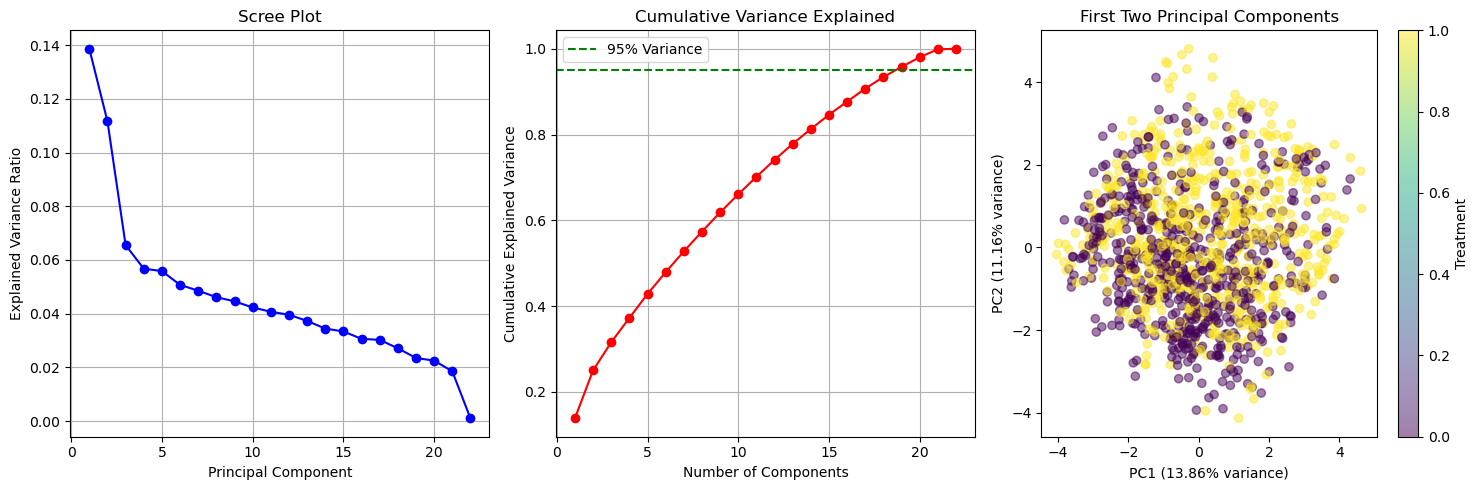


Top 5 Features in PC1:
mental_health_openness    0.466860
supervisor                0.437890
coworkers                 0.398343
mental_vs_physical        0.283929
anonymity                 0.279305
Name: PC1, dtype: float64


In [60]:
# Scree plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'ro-')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True)

# Determine optimal number of components (95% variance)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nComponents needed for 95% variance: {n_components_95}")

# Apply PCA with optimal components
pca_optimal = PCA(n_components=n_components_95)
X_pca = pca_optimal.fit_transform(X_scaled)

print(f"Reduced X_pca shape: {X_pca.shape}")  # (1259, n_components_95)

# Biplot for first 2 components
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
plt.title('First Two Principal Components')
plt.colorbar(label='Treatment')

plt.tight_layout()
plt.show()

# Feature importance in PCs
components_df = pd.DataFrame(
    pca_optimal.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components_95)],
    index=X.columns
)

print("\nTop 5 Features in PC1:")
print(components_df['PC1'].abs().sort_values(ascending=False).head())

## 5.3 Train-Test Split ##

In [61]:
# Split data (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nClass distribution in training:")
print(pd.Series(y_train).value_counts(normalize=True))

Training set: (1000, 22)
Test set: (251, 22)

Class distribution in training:
treatment_binary
1    0.505
0    0.495
Name: proportion, dtype: float64


## Section 5.3a: Logistic Regression Model ##

In [62]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### 5.3a.1 Initialize and Train Logistic Regression Model ###

In [63]:
print("="*80)
print(" "*25 + "LOGISTIC REGRESSION MODEL")
print("="*80)

# Initialize Logistic Regression with optimized parameters
lr_model = LogisticRegression(
    max_iter=1000,           # Maximum iterations for convergence
    random_state=42,         # For reproducibility
    solver='lbfgs',          # Optimization algorithm
    C=1.0,                   # Inverse of regularization strength
    class_weight='balanced', # Handle class imbalance
    n_jobs=-1                # Use all CPU cores
)

print("\nTraining Logistic Regression Model...")
print("-" * 80)

# Train the model
lr_model.fit(X_train, y_train)

print("✓ Model trained successfully!")
print(f"✓ Number of iterations: {lr_model.n_iter_[0]}")
print(f"✓ Coefficients shape: {lr_model.coef_.shape}")

                         LOGISTIC REGRESSION MODEL

Training Logistic Regression Model...
--------------------------------------------------------------------------------
✓ Model trained successfully!
✓ Number of iterations: 14
✓ Coefficients shape: (1, 22)


### 5.3a.2 Make Predictions ###

In [64]:
print("\nGenerating Predictions...")
print("-" * 80)

# Predictions on training set
y_pred_train_lr = lr_model.predict(X_train)
y_pred_proba_train_lr = lr_model.predict_proba(X_train)

# Predictions on test set
y_pred_test_lr = lr_model.predict(X_test)
y_pred_proba_test_lr = lr_model.predict_proba(X_test)

print("✓ Training predictions generated")
print("✓ Test predictions generated")


Generating Predictions...
--------------------------------------------------------------------------------
✓ Training predictions generated
✓ Test predictions generated


### 5.3a.3 Performance Metrics - Training Set ###

In [65]:
print("\n" + "="*80)
print(" "*25 + "TRAINING SET PERFORMANCE")
print("="*80)

# Calculate metrics for training set
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)
train_precision_lr = precision_score(y_train, y_pred_train_lr)
train_recall_lr = recall_score(y_train, y_pred_train_lr)
train_f1_lr = f1_score(y_train, y_pred_train_lr)

print(f"\n{'Metric':<20} {'Score':<15} {'Percentage'}")
print("-" * 50)
print(f"{'Accuracy':<20} {train_accuracy_lr:.4f}{'':<10} {train_accuracy_lr*100:.2f}%")
print(f"{'Precision':<20} {train_precision_lr:.4f}{'':<10} {train_precision_lr*100:.2f}%")
print(f"{'Recall':<20} {train_recall_lr:.4f}{'':<10} {train_recall_lr*100:.2f}%")
print(f"{'F1-Score':<20} {train_f1_lr:.4f}{'':<10} {train_f1_lr*100:.2f}%")

# Confusion Matrix for Training Set
print("\nConfusion Matrix (Training):")
print("-" * 50)
cm_train_lr = confusion_matrix(y_train, y_pred_train_lr)
print(f"\n                Predicted No    Predicted Yes")
print(f"Actual No       {cm_train_lr[0,0]:<15} {cm_train_lr[0,1]:<15}")
print(f"Actual Yes      {cm_train_lr[1,0]:<15} {cm_train_lr[1,1]:<15}")


                         TRAINING SET PERFORMANCE

Metric               Score           Percentage
--------------------------------------------------
Accuracy             0.7300           73.00%
Precision            0.7433           74.33%
Recall               0.7109           71.09%
F1-Score             0.7267           72.67%

Confusion Matrix (Training):
--------------------------------------------------

                Predicted No    Predicted Yes
Actual No       371             124            
Actual Yes      146             359            


### 5.3a.4 Performance Metrics - Test Set ###

In [66]:
print("\n" + "="*80)
print(" "*25 + "TEST SET PERFORMANCE")
print("="*80)

# Calculate metrics for test set
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
test_precision_lr = precision_score(y_test, y_pred_test_lr)
test_recall_lr = recall_score(y_test, y_pred_test_lr)
test_f1_lr = f1_score(y_test, y_pred_test_lr)

print(f"\n{'Metric':<20} {'Score':<15} {'Percentage'}")
print("-" * 50)
print(f"{'Accuracy':<20} {test_accuracy_lr:.4f}{'':<10} {test_accuracy_lr*100:.2f}%")
print(f"{'Precision':<20} {test_precision_lr:.4f}{'':<10} {test_precision_lr*100:.2f}%")
print(f"{'Recall':<20} {test_recall_lr:.4f}{'':<10} {test_recall_lr*100:.2f}%")
print(f"{'F1-Score':<20} {test_f1_lr:.4f}{'':<10} {test_f1_lr*100:.2f}%")

# Confusion Matrix for Test Set
print("\nConfusion Matrix (Test):")
print("-" * 50)
cm_test_lr = confusion_matrix(y_test, y_pred_test_lr)
print(f"\n                Predicted No    Predicted Yes")
print(f"Actual No       {cm_test_lr[0,0]:<15} {cm_test_lr[0,1]:<15}")
print(f"Actual Yes      {cm_test_lr[1,0]:<15} {cm_test_lr[1,1]:<15}")

# Calculate detailed metrics from confusion matrix
tn_lr, fp_lr, fn_lr, tp_lr = cm_test_lr.ravel()
print(f"\nDetailed Breakdown:")
print(f"  True Negatives (TN):  {tn_lr} - Correctly predicted No")
print(f"  False Positives (FP): {fp_lr} - Incorrectly predicted Yes")
print(f"  False Negatives (FN): {fn_lr} - Incorrectly predicted No")
print(f"  True Positives (TP):  {tp_lr} - Correctly predicted Yes")


                         TEST SET PERFORMANCE

Metric               Score           Percentage
--------------------------------------------------
Accuracy             0.7052           70.52%
Precision            0.7054           70.54%
Recall               0.7165           71.65%
F1-Score             0.7109           71.09%

Confusion Matrix (Test):
--------------------------------------------------

                Predicted No    Predicted Yes
Actual No       86              38             
Actual Yes      36              91             

Detailed Breakdown:
  True Negatives (TN):  86 - Correctly predicted No
  False Positives (FP): 38 - Incorrectly predicted Yes
  False Negatives (FN): 36 - Incorrectly predicted No
  True Positives (TP):  91 - Correctly predicted Yes


### 5.3a.5 Classification Report ###

In [67]:
print("\n" + "="*80)
print(" "*25 + "DETAILED CLASSIFICATION REPORT")
print("="*80)

print("\nTraining Set:")
print("-" * 80)
print(classification_report(y_train, y_pred_train_lr, 
                          target_names=['No Treatment', 'Sought Treatment']))

print("\nTest Set:")
print("-" * 80)
print(classification_report(y_test, y_pred_test_lr, 
                          target_names=['No Treatment', 'Sought Treatment']))



                         DETAILED CLASSIFICATION REPORT

Training Set:
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

    No Treatment       0.72      0.75      0.73       495
Sought Treatment       0.74      0.71      0.73       505

        accuracy                           0.73      1000
       macro avg       0.73      0.73      0.73      1000
    weighted avg       0.73      0.73      0.73      1000


Test Set:
--------------------------------------------------------------------------------
                  precision    recall  f1-score   support

    No Treatment       0.70      0.69      0.70       124
Sought Treatment       0.71      0.72      0.71       127

        accuracy                           0.71       251
       macro avg       0.71      0.71      0.71       251
    weighted avg       0.71      0.71      0.71       251



### 5.3a.6 Model Coefficients Analysis ###

In [68]:
print("\n" + "="*80)
print(" "*25 + "FEATURE COEFFICIENTS ANALYSIS")
print("="*80)

# Get coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop 15 Most Influential Features:")
print("-" * 80)
print(f"{'Rank':<6} {'Feature':<35} {'Coefficient':<15} {'Impact'}")
print("-" * 80)

for idx, row in coefficients.head(15).iterrows():
    impact = "Positive" if row['Coefficient'] > 0 else "Negative"
    print(f"{idx+1:<6} {row['Feature']:<35} {row['Coefficient']:>12.4f}   {impact}")

print("\nIntercept (Bias term):", f"{lr_model.intercept_[0]:.4f}")



                         FEATURE COEFFICIENTS ANALYSIS

Top 15 Most Influential Features:
--------------------------------------------------------------------------------
Rank   Feature                             Coefficient     Impact
--------------------------------------------------------------------------------
3      family_history                            0.7749   Positive
16     coworkers                                 0.3939   Positive
17     supervisor                               -0.3726   Negative
9      care_options                              0.3272   Positive
8      benefits                                  0.2839   Positive
21     obs_consequence                           0.2202   Positive
12     anonymity                                 0.1712   Positive
18     mental_health_interview                   0.1710   Positive
4      work_interfere                           -0.1325   Negative
11     seek_help                                -0.1144   Negative
5      no_e

### 5.3a.7 Visualizations ###


                         GENERATING VISUALIZATIONS


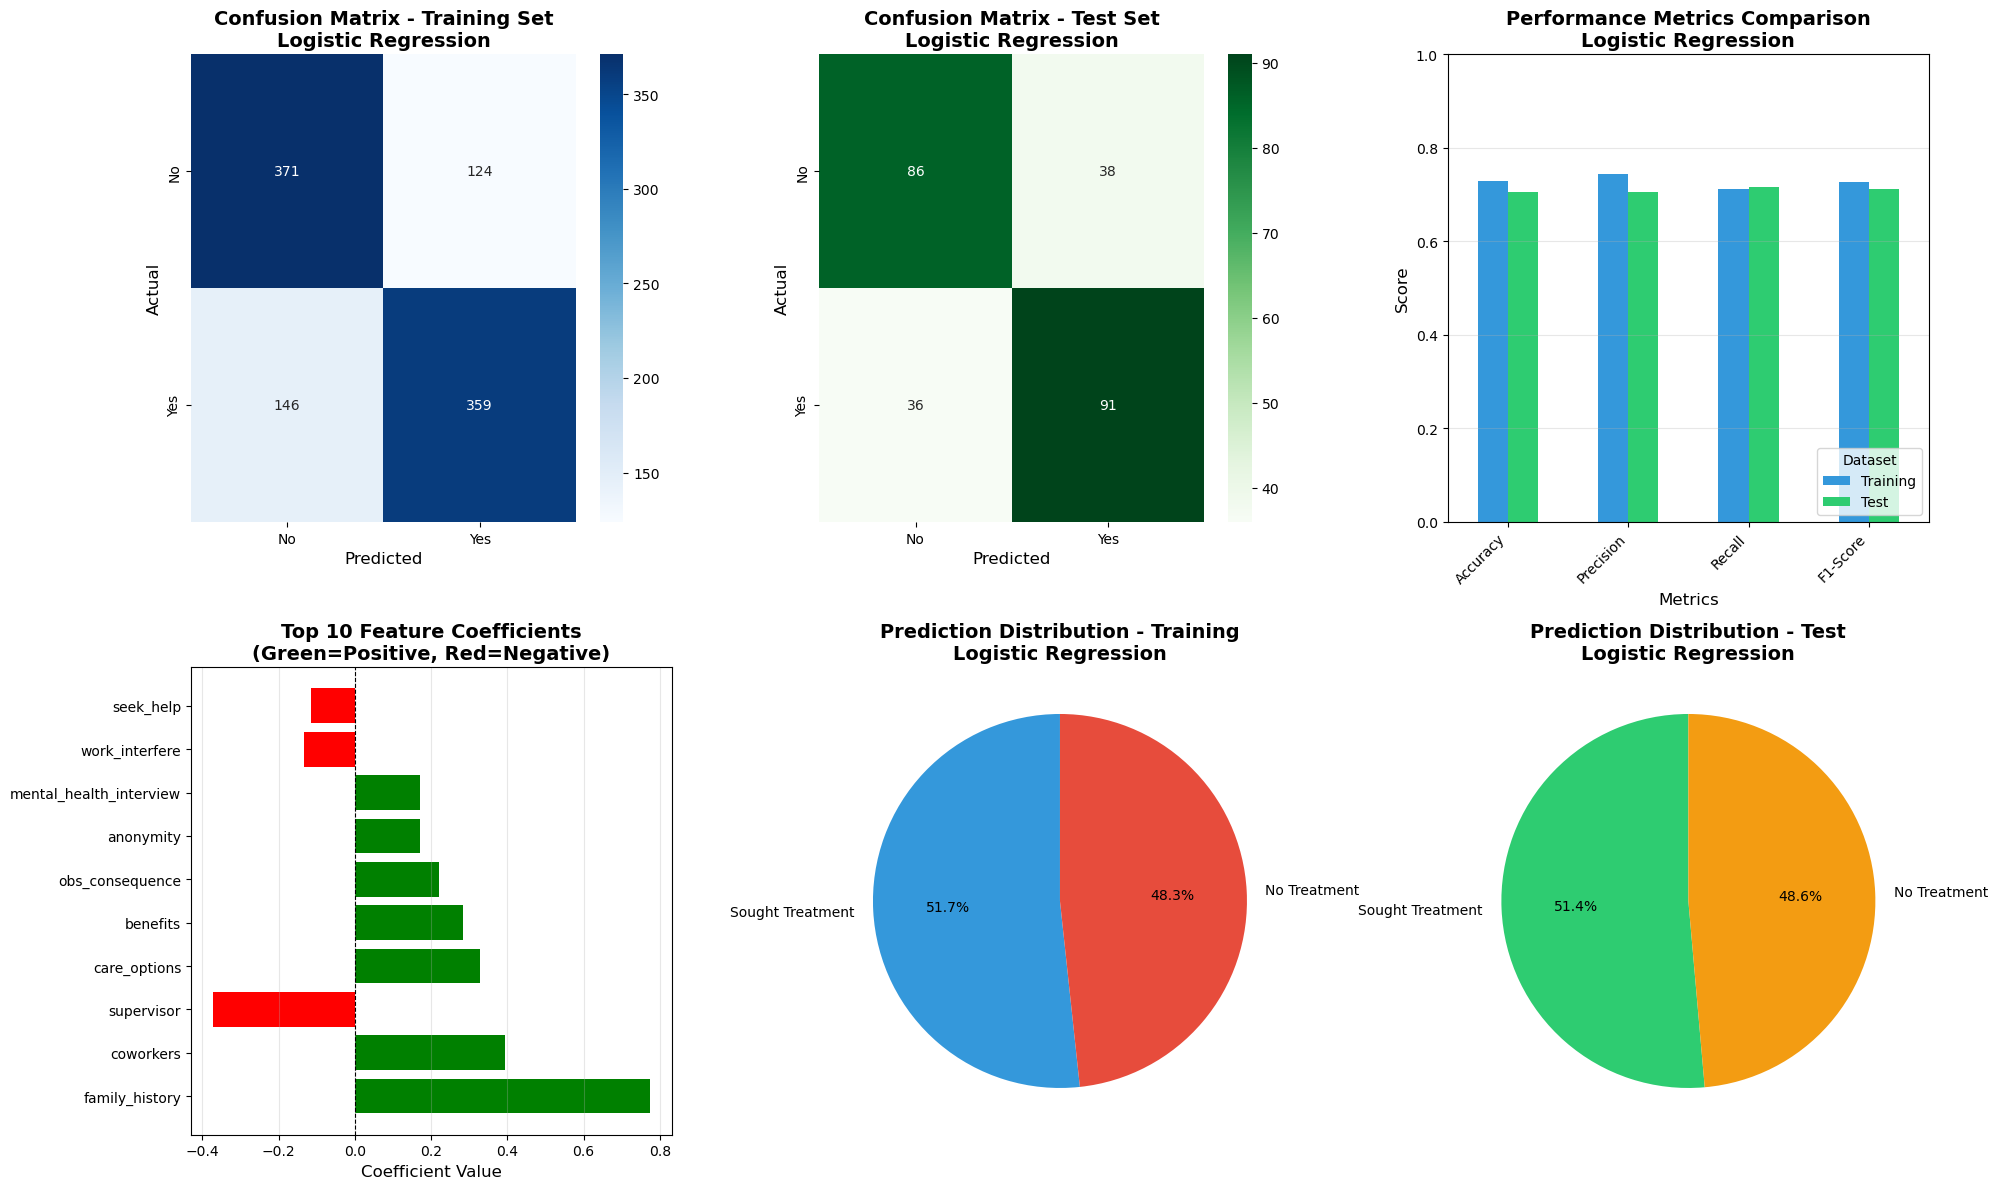

✓ Visualizations generated successfully


In [69]:

print("\n" + "="*80)
print(" "*25 + "GENERATING VISUALIZATIONS")
print("="*80)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Confusion Matrix - Training Set
plt.subplot(2, 3, 1)
sns.heatmap(cm_train_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Training Set\nLogistic Regression', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# 2. Confusion Matrix - Test Set
plt.subplot(2, 3, 2)
sns.heatmap(cm_test_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Test Set\nLogistic Regression', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# 3. Performance Metrics Comparison
plt.subplot(2, 3, 3)
metrics_comparison = pd.DataFrame({
    'Training': [train_accuracy_lr, train_precision_lr, train_recall_lr, train_f1_lr],
    'Test': [test_accuracy_lr, test_precision_lr, test_recall_lr, test_f1_lr]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

metrics_comparison.plot(kind='bar', ax=plt.gca(), color=['#3498db', '#2ecc71'])
plt.title('Performance Metrics Comparison\nLogistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset', loc='lower right')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# 4. Top 10 Feature Coefficients
plt.subplot(2, 3, 4)
top_10_coef = coefficients.head(10)
colors = ['green' if x > 0 else 'red' for x in top_10_coef['Coefficient']]
plt.barh(range(len(top_10_coef)), top_10_coef['Coefficient'], color=colors)
plt.yticks(range(len(top_10_coef)), top_10_coef['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 10 Feature Coefficients\n(Green=Positive, Red=Negative)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# 5. Prediction Distribution - Training Set
plt.subplot(2, 3, 5)
train_pred_dist = pd.Series(y_pred_train_lr).value_counts()
plt.pie(train_pred_dist, labels=['Sought Treatment', 'No Treatment'], 
        autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c'])
plt.title('Prediction Distribution - Training\nLogistic Regression', 
          fontsize=14, fontweight='bold')

# 6. Prediction Distribution - Test Set
plt.subplot(2, 3, 6)
test_pred_dist = pd.Series(y_pred_test_lr).value_counts()
plt.pie(test_pred_dist, labels=['Sought Treatment', 'No Treatment'], 
        autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#f39c12'])
plt.title('Prediction Distribution - Test\nLogistic Regression', 
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualizations generated successfully")

### 5.3a.8 Model Evaluation Summary ###

In [70]:
print("\n" + "="*80)
print(" "*25 + "LOGISTIC REGRESSION SUMMARY")
print("="*80)

print("\n📊 Model Configuration:")
print(f"   Algorithm: Logistic Regression")
print(f"   Solver: {lr_model.solver}")
print(f"   Regularization (C): {lr_model.C}")
print(f"   Max Iterations: {lr_model.max_iter}")
print(f"   Convergence Iterations: {lr_model.n_iter_[0]}")

print("\n📈 Performance Summary:")
print(f"   Training Accuracy: {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"   Test Accuracy:     {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")
print(f"   Test F1-Score:     {test_f1_lr:.4f}")
print(f"   Test Precision:    {test_precision_lr:.4f}")
print(f"   Test Recall:       {test_recall_lr:.4f}")

# Check for overfitting
accuracy_diff = train_accuracy_lr - test_accuracy_lr
if accuracy_diff < 0.05:
    print(f"\n✓ Model Status: Good Generalization (Δ Accuracy: {accuracy_diff:.4f})")
elif accuracy_diff < 0.10:
    print(f"\n⚠ Model Status: Slight Overfitting (Δ Accuracy: {accuracy_diff:.4f})")
else:
    print(f"\n⚠ Model Status: Overfitting Detected (Δ Accuracy: {accuracy_diff:.4f})")

print("\n🎯 Top 3 Positive Influencers (Increase treatment likelihood):")
positive_coef = coefficients[coefficients['Coefficient'] > 0].head(3)
for idx, row in positive_coef.iterrows():
    print(f"   • {row['Feature']}: +{row['Coefficient']:.4f}")

print("\n🎯 Top 3 Negative Influencers (Decrease treatment likelihood):")
negative_coef = coefficients[coefficients['Coefficient'] < 0].head(3)
for idx, row in negative_coef.iterrows():
    print(f"   • {row['Feature']}: {row['Coefficient']:.4f}")

print("\n" + "="*80)
print("Logistic Regression Model Training Complete!")
print("="*80)

# Store results for later comparison with Random Forest
lr_results = {
    'model_name': 'Logistic Regression',
    'train_accuracy': train_accuracy_lr,
    'test_accuracy': test_accuracy_lr,
    'test_precision': test_precision_lr,
    'test_recall': test_recall_lr,
    'test_f1': test_f1_lr,
    'confusion_matrix': cm_test_lr
}


                         LOGISTIC REGRESSION SUMMARY

📊 Model Configuration:
   Algorithm: Logistic Regression
   Solver: lbfgs
   Regularization (C): 1.0
   Max Iterations: 1000
   Convergence Iterations: 14

📈 Performance Summary:
   Training Accuracy: 0.7300 (73.00%)
   Test Accuracy:     0.7052 (70.52%)
   Test F1-Score:     0.7109
   Test Precision:    0.7054
   Test Recall:       0.7165

✓ Model Status: Good Generalization (Δ Accuracy: 0.0248)

🎯 Top 3 Positive Influencers (Increase treatment likelihood):
   • family_history: +0.7749
   • coworkers: +0.3939
   • care_options: +0.3272

🎯 Top 3 Negative Influencers (Decrease treatment likelihood):
   • supervisor: -0.3726
   • work_interfere: -0.1325
   • seek_help: -0.1144

Logistic Regression Model Training Complete!


## 6.3 Feature Importance ##

In [75]:
# Generate comprehensive report
print("="*80)
print(" "*20 + "MENTAL HEALTH IN TECH - PROJECT SUMMARY")
print("="*80)

print("\n1. DATASET STATISTICS")
print(f"   Total Records: {len(df)}")
print(f"   Total Features: {len(df.columns)}")
print(f"   Treatment Seekers: {(df['treatment']=='Yes').sum()} ({(df['treatment']=='Yes').sum()/len(df)*100:.1f}%)")

print("\n2. DATA QUALITY")
print(f"   Missing Values Handled: Yes")
print(f"   Outliers Removed: {1259 - len(df)}")
print(f"   Features Engineered: 3 (Age_Group, treatment_binary, mental_health_openness)")

print("\n3. PCA RESULTS")
print(f"   Original Dimensions: 22")
print(f"   Reduced Dimensions: {n_components_95}")
print(f"   Variance Retained: 95%")

print("\n4. MODEL PERFORMANCE")
print(f"   Algorithm: Logistic Regression")
print(f"   Training Accuracy: {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"   Test Accuracy:     {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")
print(f"   Test F1-Score:     {test_f1_lr:.4f}")
print(f"   Test Precision:    {test_precision_lr:.4f}")
print(f"   Test Recall:       {test_recall_lr:.4f}")

print("\n5. TOP 5 INFLUENTIAL FEATURES")
for idx, row in feature_importance.head(5).iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")

print("\n6. HYPOTHESIS TESTING RESULTS")
hypotheses = [
    ("Family History → Treatment", p_value, p_value < 0.05),
    ("Gender → Treatment", p_value_2, p_value_2 < 0.05),
    ("Company Size → Treatment", p_value_3, p_value_3 < 0.05),
    ("Age Group → Treatment", p_value_4, p_value_4 < 0.05),
    ("Remote Work → Treatment", p_value_5, p_value_5 < 0.05)
]

for i, (hypothesis, p_val, significant) in enumerate(hypotheses, 1):
    status = "✓ SIGNIFICANT" if significant else "✗ NOT SIGNIFICANT"
    print(f"   H{i}. {hypothesis}: p={p_val:.4e} [{status}]")

print("\n7. KEY INSIGHTS")
print(f"   - {feature_importance.iloc[0]['Feature']} is the most influential factor")
print(f"   - {(df['family_history']=='Yes').sum()} respondents have family history")
print(f"   - {(df['remote_work']=='Yes').sum()} have remote work options")
print(f"   - Average age of respondents: {df['Age'].mean():.1f} years")

print("\n" + "="*80)

                    MENTAL HEALTH IN TECH - PROJECT SUMMARY

1. DATASET STATISTICS
   Total Records: 1251
   Total Features: 28
   Treatment Seekers: 632 (50.5%)

2. DATA QUALITY
   Missing Values Handled: Yes
   Outliers Removed: 8
   Features Engineered: 3 (Age_Group, treatment_binary, mental_health_openness)

3. PCA RESULTS
   Original Dimensions: 22
   Reduced Dimensions: 19
   Variance Retained: 95%

4. MODEL PERFORMANCE
   Algorithm: Logistic Regression
   Training Accuracy: 0.7300 (73.00%)
   Test Accuracy:     0.7052 (70.52%)
   Test F1-Score:     0.7109
   Test Precision:    0.7054
   Test Recall:       0.7165

5. TOP 5 INFLUENTIAL FEATURES
   4. work_interfere: 0.3442
   3. family_history: 0.1227
   1. Age: 0.0733
   9. care_options: 0.0561
   8. benefits: 0.0433

6. HYPOTHESIS TESTING RESULTS
   H1. Family History → Treatment: p=3.7036e-40 [✓ SIGNIFICANT]
   H2. Gender → Treatment: p=2.0207e-03 [✓ SIGNIFICANT]
   H3. Company Size → Treatment: p=1.1651e-01 [✗ NOT SIGNIFICANT]

In [73]:
# Example new input
new_input = {
    'Age': 30,
    'Gender': 'Male',
    'family_history': 'No',
    'work_interfere': 'Often',
    'no_employees': '6-25',
    'remote_work': 'Yes',
    'tech_company': 'Yes',
    'benefits': 'Yes',
    'care_options': 'No',
    'wellness_program': 'No',
    'seek_help': 'No',
    'anonymity': 'Yes',
    'leave': 'Somewhat easy',
    'mental_health_consequence': 'No',
    'phys_health_consequence': 'No',
    'coworkers': 'Yes',
    'supervisor': 'Yes',
    'mental_health_interview': 'Maybe',
    'phys_health_interview': 'No',
    'mental_vs_physical': 'Yes',
    'obs_consequence': 'No',
    'mental_health_openness': 2
}

# Convert to DataFrame
new_df = pd.DataFrame([new_input])

# Label encoding
for col in new_df.columns:
    if col in le_dict:
        new_df[col] = le_dict[col].transform(new_df[col].astype(str))

# Scale
new_scaled = scaler.transform(new_df)

# Predict
prediction = rf_model.predict(new_scaled)
print("Treatment Prediction:", "Yes" if prediction[0] == 1 else "No")


Treatment Prediction: Yes


In [74]:
# ---------- Robust prediction snippet (drop-in) ----------
import pandas as pd
import numpy as np

# 1) your raw new_data (keep your values)
new_data = pd.DataFrame([{
    "Age": 33,
    "Gender": "Female",
    "Country": "United States",
    "self_employed": "No",
    "family_history": "No",
    "work_interfere": "Rarely",
    "no_employees": "100-500",
    "remote_work": "No",
    "tech_company": "Yes",
    "benefits": "No",
    "care_options": "No",
    "wellness_program": "Yes",
    "seek_help": "No",
    "anonymity": "No",
    "leave": "Very difficult",
    "mental_health_consequence": "No",
    "phys_health_consequence": "No",
    "coworkers": "No",
    "supervisor": "No",
    "mental_health_interview": "No",
    "phys_health_interview": "No",
    "mental_vs_physical": "No",
    "obs_consequence": "No"
}])

# 2) Ensure engineered feature: mental_health_openness
def openness_score(row):
    score = 0
    for col in ['coworkers', 'supervisor', 'mental_health_interview']:
        v = str(row.get(col, '')).strip()
        if v == 'Yes':
            score += 2
        elif v == 'Some of them':
            score += 1
    return score

if 'mental_health_openness' not in new_data.columns:
    new_data['mental_health_openness'] = new_data.apply(openness_score, axis=1)

# 3) Drop columns not used in training (e.g., Country, self_employed) so the column set matches X
cols_to_keep = list(X.columns)   # X from your training pipeline
new_data = new_data.reindex(columns=cols_to_keep, fill_value=np.nan)

# 4) Safe encoding using le_dict (maps unseen labels -> -1)
encoded_new_data = new_data.copy()
for col, le in le_dict.items():
    if col in encoded_new_data.columns:
        # convert to str then safe encode
        encoded_new_data[col] = encoded_new_data[col].astype(str)
        def safe_encode(x, le=le):
            try:
                return le.transform([x])[0] if x in le.classes_ else -1
            except Exception:
                return -1
        encoded_new_data[col] = encoded_new_data[col].apply(safe_encode)

# 5) Numeric columns: convert types if needed
for c in cols_to_keep:
    if c not in le_dict and c in encoded_new_data.columns:
        # try convert to numeric (Age, mental_health_openness, etc.)
        encoded_new_data[c] = pd.to_numeric(encoded_new_data[c], errors='coerce')

# 6) Fill missing numeric values with training means
train_means = pd.Series(X.mean(), index=X.columns)
encoded_new_data = encoded_new_data.fillna(train_means)

# 7) Final check: ensure same column order as scaler expects
encoded_new_data = encoded_new_data[cols_to_keep]

# 8) Scale
encoded_new_data_scaled = scaler.transform(encoded_new_data)

# 9) PCA if your pipeline used pca for prediction (optional). 
# If you trained the RF on scaled features (not PCA), use scaled directly.
if 'pca' in globals() and isinstance(pca, PCA) and rf_model.n_features_in_ == pca.n_components_:
    # if rf was trained on PCA features, transform; otherwise skip this
    new_data_final = pca.transform(encoded_new_data_scaled)
else:
    new_data_final = encoded_new_data_scaled

# 10) Predict
predicted_output = rf_model.predict(new_data_final)[0]
pred_proba = rf_model.predict_proba(new_data_final)[0] if hasattr(rf_model, "predict_proba") else None

print("🔹 Predicted Output (label):", "Yes" if predicted_output==1 else "No")
if pred_proba is not None:
    print(f"🔹 Probability(class=1): {pred_proba[1]:.3f}")


🔹 Predicted Output (label): Yes
🔹 Probability(class=1): 0.515
